In [1]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from sklearn.model_selection import train_test_split
from ISLP import confusion_table

In [2]:
from functools import partial
from sklearn.model_selection import \
     (cross_validate,
      KFold,
      ShuffleSplit)
from sklearn.base import clone
from ISLP.models import sklearn_sm

In [3]:
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.pipeline import Pipeline
from ISLP.models import \
     (Stepwise,
      sklearn_selected,
      sklearn_selection_path)
from l0bnb import fit_path

In [5]:
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)

In [6]:
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm

# 9.

In this exercise, we will predict the number of applications received
using the other variables in the College data set.

# a)

In [17]:
college = pd.read_csv('College.csv')
college2 = pd.read_csv('College.csv', index_col=0)
college3 = college.rename({'Unnamed: 0': 'College'},axis=1)
college3 = college3.set_index('College')
college = college3

In [18]:
college.loc[college['Private'] == 'Yes', 'Private'] = 1
college.loc[college['Private'] == 'No', 'Private'] = 0
college['Private'] = pd.to_numeric(college['Private'])

In [19]:
# Podatci su podijeljeni na pola
college_train, college_valid = train_test_split(college,
                                         test_size=0.5,
                                         random_state=0)


In [20]:
#terms = college.columns.drop('Apps','Private')
#terms = MS(terms.drop(['Private']))

# b)

In [21]:
terms = MS(college.columns.drop('Apps'))
X_train = terms.fit_transform(college_train)
y_train = college_train['Apps']
model = sm.OLS(y_train, X_train)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-530.4844,573.742,-0.925,0.356
Private,-645.9310,196.760,-3.283,0.001
Accept,1.2578,0.068,18.526,0.000
Enroll,-0.2790,0.250,-1.116,0.265
Top10perc,56.1842,8.085,6.950,0.000
Top25perc,-20.6177,6.523,-3.161,0.002
F.Undergrad,0.0903,0.042,2.148,0.032
P.Undergrad,0.0265,0.040,0.667,0.505
Outstate,-0.0335,0.028,-1.195,0.233
Room.Board,0.1918,0.071,2.682,0.008


In [22]:
X_test = terms.transform(college_valid)
y_test = college_valid['Apps']
valid_pred = results.predict(X_test)
np.mean((y_test - valid_pred)**2)

1260390.842603787

Testni MSE je 1260390.84

The test MSE is 1260390.84

# c)

In [23]:
X_train = np.asarray(X_train.drop('intercept', axis=1))
Y_train = np.array(y_train)
X_test = X_test.drop('intercept', axis=1)
X_test = np.array(X_test)

In [24]:
lambdas = 10**np.linspace(7, -3, 100) / Y_train.std()
K = 5

In [25]:
## priprema ridge s automatskim skaliranjem
ridge = skl.ElasticNet(alpha=10, l1_ratio=0)
scaler = StandardScaler(with_mean=True,  with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('ridge', ridge)])

In [26]:
#Traži najbolji lambda tj. alpha
ridgeCV = skl.ElasticNetCV(alphas=lambdas, 
                           l1_ratio=0,
                           cv=10)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('ridge', ridgeCV)])
pipeCV.fit(X_train, Y_train)

C:\Users\Josip\anaconda3\envs\islp\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Josip\anaconda3\envs\islp\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2651935961.1339927, tolerance: 531160.3461106017
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Josip\anaconda3\envs\islp\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Josip\anaconda3\envs\islp\Lib\site-packages\sklearn\linear_model\_coordina

C:\Users\Josip\anaconda3\envs\islp\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2791338834.6256003, tolerance: 559629.1405587393
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Josip\anaconda3\envs\islp\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Josip\anaconda3\envs\islp\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2789563062.227327, tolerance: 559629.1405587393
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Josip\anaconda3\envs\islp\Lib\site-packages\sklearn\linear_model

C:\Users\Josip\anaconda3\envs\islp\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189247460.34246713, tolerance: 557112.6689260745
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Josip\anaconda3\envs\islp\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Josip\anaconda3\envs\islp\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189247287.19268084, tolerance: 557112.6689260745
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Josip\anaconda3\envs\islp\Lib\site-packages\sklearn\linear_mode

C:\Users\Josip\anaconda3\envs\islp\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2710253068.4764247, tolerance: 543646.3932183381
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Josip\anaconda3\envs\islp\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Josip\anaconda3\envs\islp\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2708173258.619553, tolerance: 543646.3932183381
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Josip\anaconda3\envs\islp\Lib\site-packages\sklearn\linear_model

C:\Users\Josip\anaconda3\envs\islp\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 193780225.69765815, tolerance: 506315.6234882521
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Josip\anaconda3\envs\islp\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Josip\anaconda3\envs\islp\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 193780049.38882974, tolerance: 506315.6234882521
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Josip\anaconda3\envs\islp\Lib\site-packages\sklearn\linear_mode

C:\Users\Josip\anaconda3\envs\islp\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176579685.50629914, tolerance: 541413.3236197144
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Josip\anaconda3\envs\islp\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Josip\anaconda3\envs\islp\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176579547.52211827, tolerance: 541413.3236197144
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Josip\anaconda3\envs\islp\Lib\site-packages\sklearn\linear_mode

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge',
                 ElasticNetCV(alphas=array([2.56902167e+03, 2.03590574e+03, 1.61342048e+03, 1.27860814e+03,
       1.01327508e+03, 8.03003174e+02, 6.36366283e+02, 5.04309396e+02,
       3.99656572e+02, 3.16720999e+02, 2.50995975e+02, 1.98910018e+02,
       1.57632787e+02, 1.24921288e+02, 9.89979845e+01, 7.84542097e+01,
       6.21736195e+01, 4.92715302e+01,...
       5.40754435e-05, 4.28538642e-05, 3.39609545e-05, 2.69134757e-05,
       2.13284692e-05, 1.69024471e-05, 1.33949003e-05, 1.06152294e-05,
       8.41238775e-06, 6.66667343e-06, 5.28322468e-06, 4.18686521e-06,
       3.31801907e-06, 2.62947337e-06, 2.08381268e-06, 1.65138591e-06,
       1.30869509e-06, 1.03711848e-06, 8.21898660e-07, 6.51340632e-07,
       5.16176312e-07, 4.09060900e-07, 3.24173767e-07, 2.56902167e-07]),
                              cv=10, l1_ratio=0))])

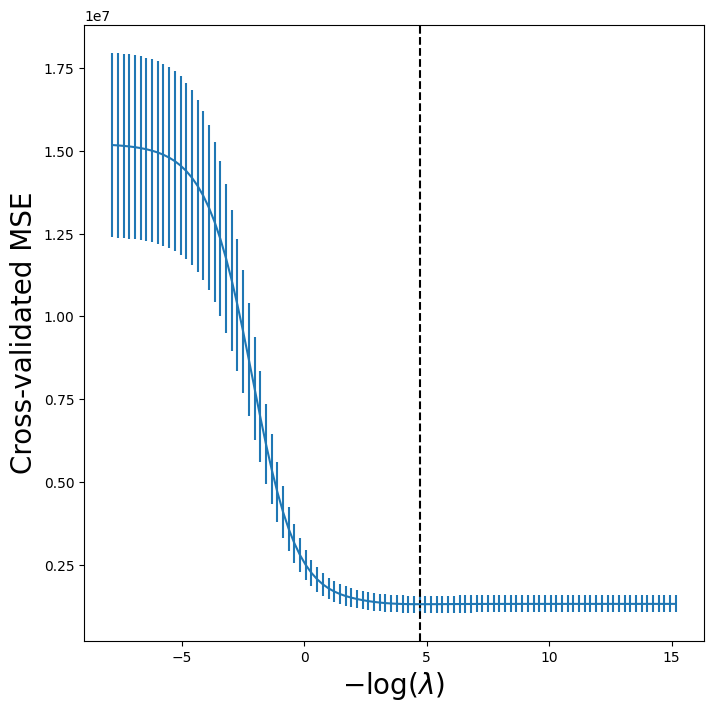

In [27]:
#Crta MSE za sve -log(lambda)
tuned_ridge = pipeCV.named_steps['ridge']
ridgeCV_fig, ax = plt.subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            tuned_ridge.mse_path_.mean(1),
            yerr=tuned_ridge.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_ridge.alpha_), c='k', ls='--')
#ax.set_ylim([50000,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [28]:
tuned_ridge.alpha_ #najbolji lambda/alpha

0.009020327642391126

In [29]:
np.min(tuned_ridge.mse_path_.mean(1)) #najbolji MSE

1314429.4602230738

In [30]:
tuned_ridge.coef_ #Koeficijenti za najbolji lambda/alpha

array([-306.04880762, 2891.06434935,   -3.584591  ,  923.98936786,
       -333.16648454,  462.13604453,   38.2702622 ,  -85.13869874,
        222.17195096,   -6.05182539,  -43.74393709, -152.61140265,
        -77.42940102,   66.45206226, -123.07088666,  397.84135166,
        210.33002499])

In [31]:
#Ridge s najboljim lambda/alpha
ridge = skl.ElasticNet(alpha=tuned_ridge.alpha_, l1_ratio=0)
scaler = StandardScaler(with_mean=True,  with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('ridge', ridge)])
pipe.fit(X_train, Y_train).score(X_test, y_test)

C:\Users\Josip\anaconda3\envs\islp\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.288e+08, tolerance: 5.879e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


0.9060585514153132

In [32]:
np.mean((pipe.predict(X_test) - y_test) ** 2) #MSE Ridge-a s najboljim lambda/alpha

1381641.8358728292

Testni MSE je 1381641.84

The test MSE is 1381641.84

# d)

In [33]:
## priprema lasso

lasso = skl.ElasticNet(alpha=10, l1_ratio=1)
scaler = StandardScaler(with_mean=True,  with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('lasso', lasso)])

In [34]:
#Traži najbolji lambda tj. alpha

lassoCV = skl.ElasticNetCV(alphas=lambdas, 
                           l1_ratio=1,
                           cv=10)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('lasso', lassoCV)])
pipeCV.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso',
                 ElasticNetCV(alphas=array([2.56902167e+03, 2.03590574e+03, 1.61342048e+03, 1.27860814e+03,
       1.01327508e+03, 8.03003174e+02, 6.36366283e+02, 5.04309396e+02,
       3.99656572e+02, 3.16720999e+02, 2.50995975e+02, 1.98910018e+02,
       1.57632787e+02, 1.24921288e+02, 9.89979845e+01, 7.84542097e+01,
       6.21736195e+01, 4.92715302e+01,...
       5.40754435e-05, 4.28538642e-05, 3.39609545e-05, 2.69134757e-05,
       2.13284692e-05, 1.69024471e-05, 1.33949003e-05, 1.06152294e-05,
       8.41238775e-06, 6.66667343e-06, 5.28322468e-06, 4.18686521e-06,
       3.31801907e-06, 2.62947337e-06, 2.08381268e-06, 1.65138591e-06,
       1.30869509e-06, 1.03711848e-06, 8.21898660e-07, 6.51340632e-07,
       5.16176312e-07, 4.09060900e-07, 3.24173767e-07, 2.56902167e-07]),
                              cv=10, l1_ratio=1))])

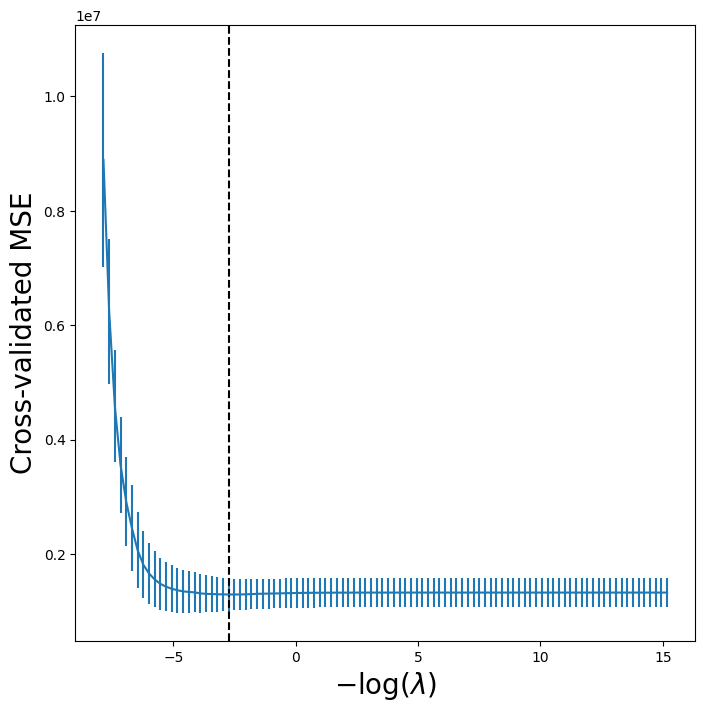

In [35]:
#Crta MSE za sve -log(lambda)

tuned_lasso = pipeCV.named_steps['lasso']
lassoCV_fig, ax = plt.subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            tuned_lasso.mse_path_.mean(1),
            yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
#ax.set_ylim([50000,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [36]:
tuned_lasso.alpha_ #najbolji lambda/alpha

15.400880281289526

In [37]:
np.min(tuned_lasso.mse_path_.mean(1)) #MSE lasso-a s najboljim lambda/alpha

1289896.147280955

In [38]:
tuned_lasso.coef_ #Koeficijenti za najbolji lambda/alpha

array([-284.86179326, 3041.4260829 ,    0.        ,  837.82099227,
       -245.01404281,  319.27338347,   24.24317648,  -58.14655355,
        180.20932374,   -0.        ,  -13.83356329, -120.80322752,
        -68.27275206,   33.83457252,  -90.77117343,  346.73215482,
        156.85024877])

In [39]:
#Lasso s najboljim lambda/alpha

lasso = skl.ElasticNet(alpha=tuned_ridge.alpha_, l1_ratio=1)
scaler = StandardScaler(with_mean=True,  with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('lasso', lasso)])
pipe.fit(X_train, Y_train).score(X_test, y_test)

0.9142997881177835

In [40]:
np.mean((pipe.predict(X_test) - y_test) ** 2)  #MSE Lasso-a s najboljim lambda/alpha

1260434.024209176

Testni MSE je 1260434.02.

2 koeficijenta su nula dok ostali nisu.

The test MSE is 1260434.02.

Two coefficients are zero while the others are not.

# g)

Lasso je imao najbolje rezultate sa score = 0.91, a Ridge je imao najgore.

Lasso had the best results with a score of 0.91, while Ridge had the worst.

In [41]:
np.sqrt(1260434.024209176) ##Korijen MSE od Lasso

1122.6905291348885

In [42]:
np.sqrt(1381641.8358728292) ##Korijen MSE od Ridge

1175.432616474815

Sudeći isključivo po MSE, vidimo da u ovako postavljenom slučaju nema velike razlike između tri metode.

Judging solely by the MSE, we see that in this setup there is no significant difference between the three methods.